In [29]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lightgbm import LGBMClassifier


In [30]:
df = pd.read_csv("credit_data.csv")
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


<div class ="big-font">Data cleaning </div>

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

In [32]:
df.describe()

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
count,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000
mean,44.005217,76499.163856,582.953773,307.965146,4.701693,105795.342773,133.340654,71.643101,77.350155
std,15.311051,42875.575193,163.076754,175.083268,2.980351,40458.370929,96.064132,16.865785,24.509196
min,18.000000,9000.000000,300.000000,6.000000,0.000000,5294.000000,12.000000,40.000000,0.000000
25%,31.000000,42000.000000,446.000000,156.000000,2.000000,72173.000000,62.000000,58.105848,61.000000
50%,44.000000,68000.000000,584.000000,307.000000,5.000000,111263.000000,100.000000,72.133017,89.000000
75%,57.000000,104000.000000,722.000000,460.000000,7.000000,150000.000000,201.000000,86.239725,98.000000
max,70.000000,209000.000000,850.000000,611.000000,10.000000,150000.000000,359.000000,95.000000,100.000000


In [33]:
# Check for duplicates
duplicates = df.duplicated().sum()
# Check for missing values
missing_values = df.isnull().sum()

duplicates, missing_values


(100814,
 Age                             0
 Gender                          0
 Income                          0
 Credit Score                    0
 Credit History Length           0
 Number of Existing Loans        0
 Loan Amount                     0
 Loan Tenure                     0
 Existing Customer               0
 State                           0
 City                            0
 LTV Ratio                       0
 Employment Profile              0
 Profile Score                   0
 Occupation                  18272
 dtype: int64)

so many duplicate value because of there same occupation,ageand others

In [34]:
#employment profile is "Unemployed" there is  missing  value for Occupation
df[df['Occupation'].isna()]

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
25,61,Female,41000,307,104,0,23296,99,No,Rajasthan,Udaipur,58.686622,Unemployed,23,NaN
28,52,Female,87000,697,26,7,141231,70,Yes,Delhi,New Delhi,94.616809,Unemployed,58,NaN
31,57,Female,130000,850,600,10,56891,195,Yes,Telangana,Hyderabad,40.481983,Unemployed,96,NaN
33,53,Male,33000,428,576,2,99179,56,No,Delhi,New Delhi,53.836170,Unemployed,62,NaN
41,18,Other,16000,329,436,0,12592,119,No,Telangana,Hyderabad,94.802565,Unemployed,17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279777,24,Female,67000,374,238,1,120860,81,No,Karnataka,Mysuru,52.352218,Unemployed,52,NaN
279792,24,Female,51000,514,549,3,150000,69,No,West Bengal,Kolkata,54.303719,Unemployed,80,NaN
279806,39,Male,22000,683,262,6,51961,261,Yes,West Bengal,Kolkata,93.614738,Unemployed,84,NaN
279825,70,Male,41000,626,151,5,139038,300,No,Telangana,Channarayapatna,53.113861,Unemployed,99,NaN


In [35]:
# now there is no missing value
mask = df['Employment Profile'] == 'Unemployed'
df.loc[mask, 'Occupation'] = df.loc[mask, 'Occupation'].fillna('None')


In [36]:
# Check for missing values

missing_values

Age                             0
Gender                          0
Income                          0
Credit Score                    0
Credit History Length           0
Number of Existing Loans        0
Loan Amount                     0
Loan Tenure                     0
Existing Customer               0
State                           0
City                            0
LTV Ratio                       0
Employment Profile              0
Profile Score                   0
Occupation                  18272
dtype: int64

Exploration and Preparation

In [37]:
# Investigate the structure and shape of the dataset
print(df.shape)
print(df.columns)

(279856, 15)
Index(['Age', 'Gender', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure',
       'Existing Customer', 'State', 'City', 'LTV Ratio', 'Employment Profile',
       'Profile Score', 'Occupation'],
      dtype='object')


In [38]:
# Compute summary statistics for numeric columns
print(df.describe())



                 Age         Income   Credit Score  Credit History Length  \
count  279856.000000  279856.000000  279856.000000          279856.000000   
mean       44.005217   76499.163856     582.953773             307.965146   
std        15.311051   42875.575193     163.076754             175.083268   
min        18.000000    9000.000000     300.000000               6.000000   
25%        31.000000   42000.000000     446.000000             156.000000   
50%        44.000000   68000.000000     584.000000             307.000000   
75%        57.000000  104000.000000     722.000000             460.000000   
max        70.000000  209000.000000     850.000000             611.000000   

       Number of Existing Loans    Loan Amount    Loan Tenure      LTV Ratio  \
count             279856.000000  279856.000000  279856.000000  279856.000000   
mean                   4.701693  105795.342773     133.340654      71.643101   
std                    2.980351   40458.370929      96.064132     

Explore the variables and their distribution.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


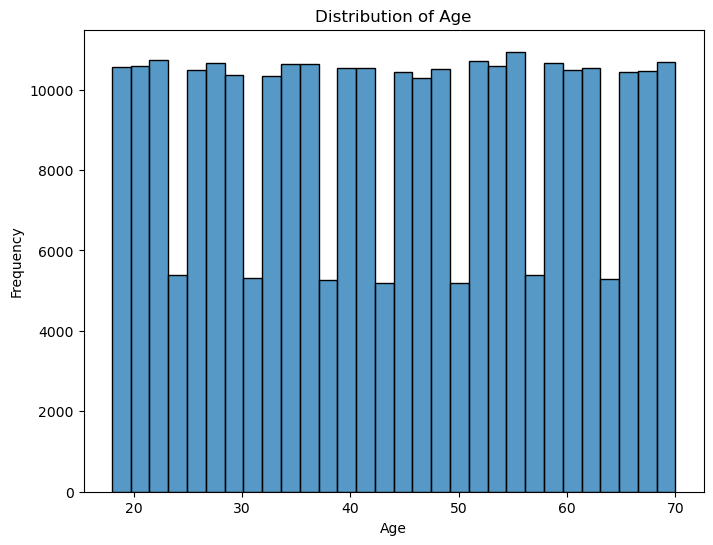

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


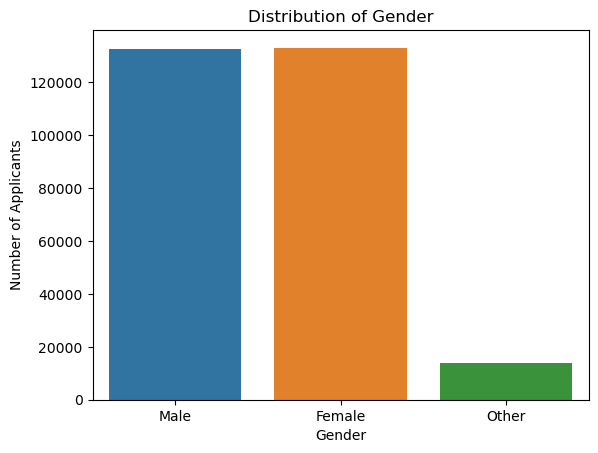

In [40]:
# Plotting the bar chart
sns.countplot(x='Gender', data=df, order=['Male', 'Female', 'Other'])
plt.title('Distribution of Gender')
plt.ylabel('Number of Applicants')
plt.xlabel('Gender')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


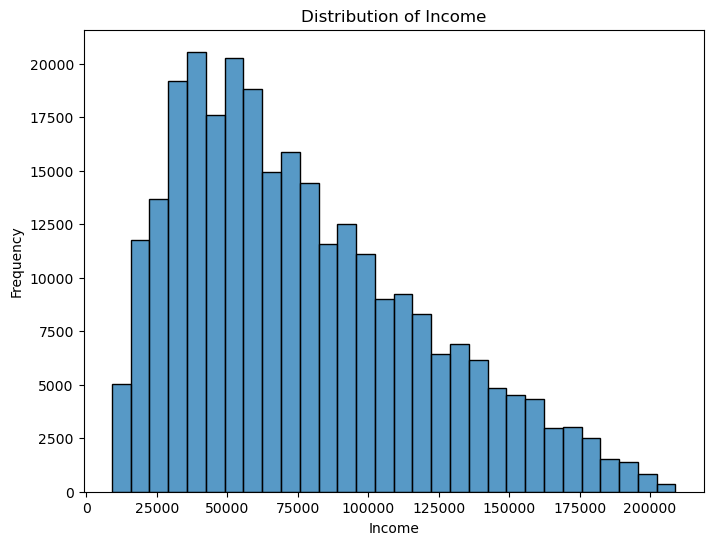

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'].dropna(), bins=30, kde=False)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


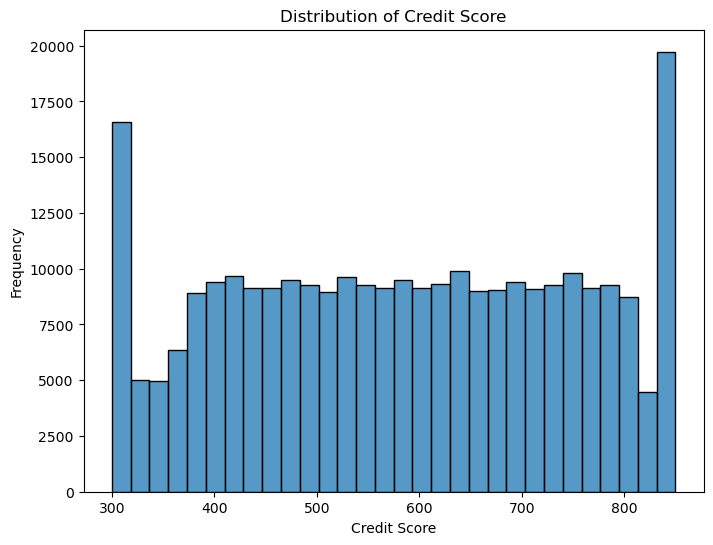

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Credit Score'].dropna(), bins=30, kde=False)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')




plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


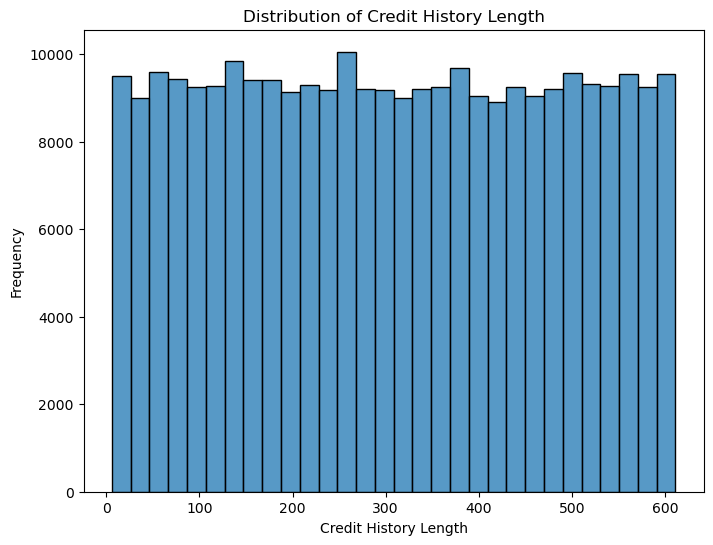

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Credit History Length'].dropna(), bins=30, kde=False)
plt.title('Distribution of Credit History Length')
plt.xlabel('Credit History Length')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


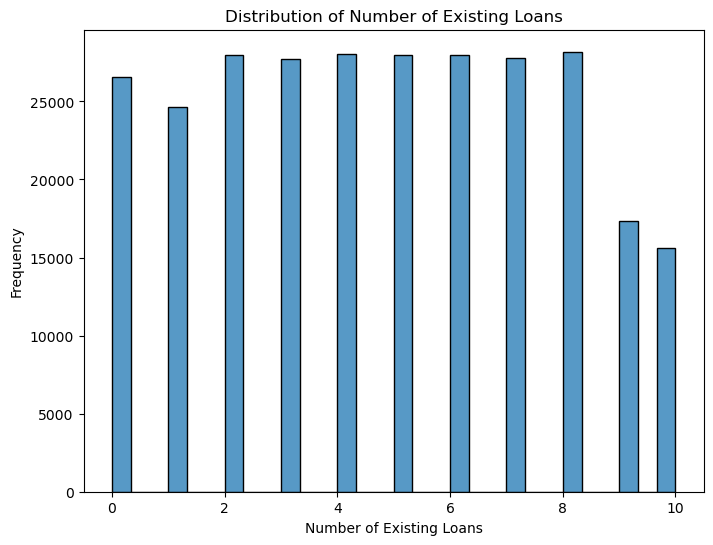

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Number of Existing Loans'].dropna(), bins=30, kde=False)
plt.title('Distribution of Number of Existing Loans')
plt.xlabel('Number of Existing Loans')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


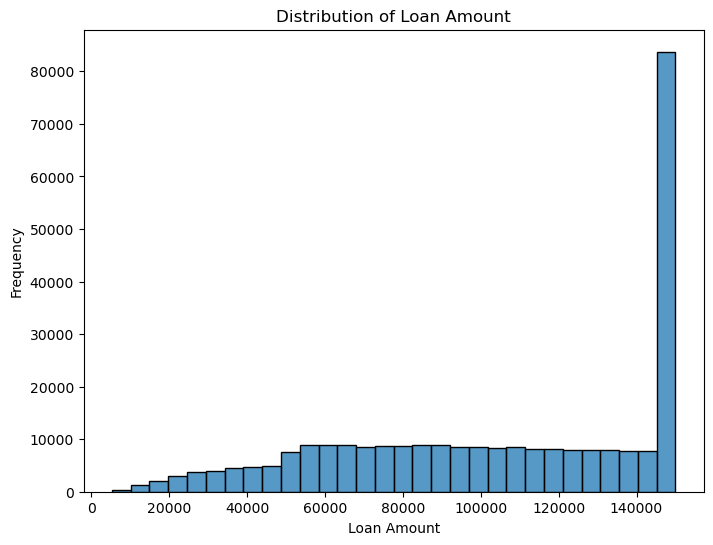

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Loan Amount'].dropna(), bins=30, kde=False)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


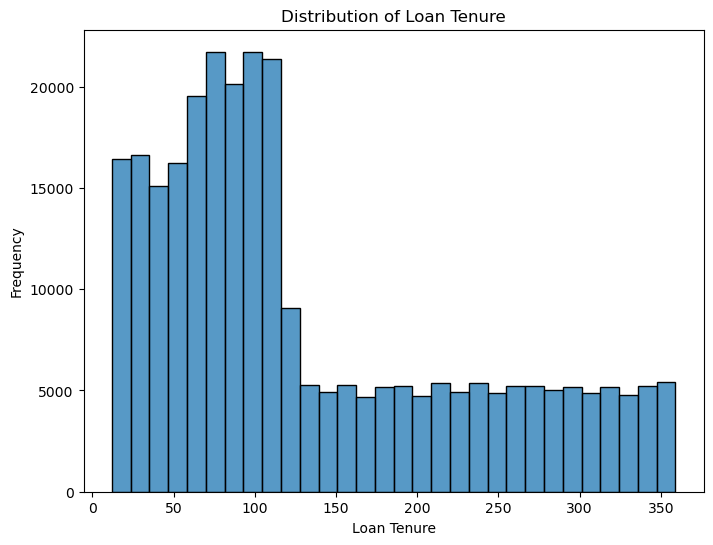

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Loan Tenure'].dropna(), bins=30, kde=False)
plt.title('Distribution of Loan Tenure')
plt.xlabel('Loan Tenure')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


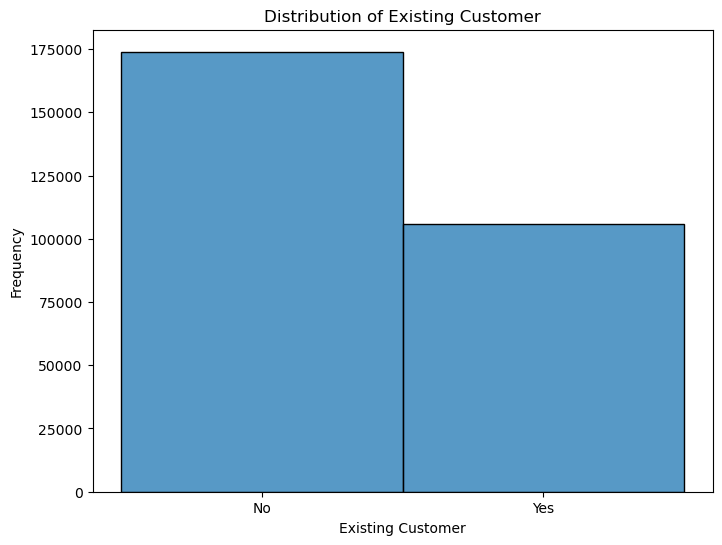

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Existing Customer'].dropna(), bins=30, kde=False)
plt.title('Distribution of Existing Customer')
plt.xlabel('Existing Customer')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


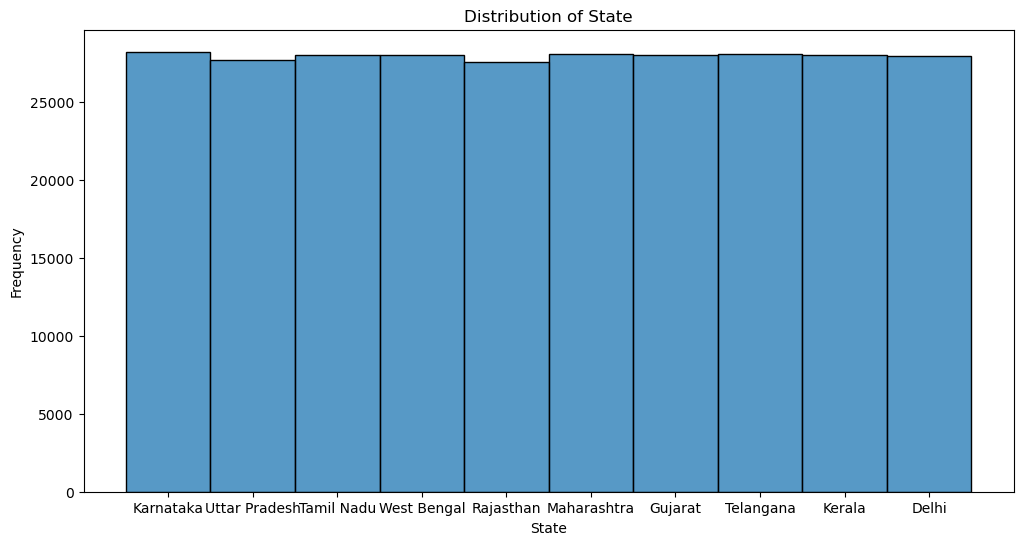

In [48]:
plt.figure(figsize=(12, 6))
sns.histplot(df['State'].dropna(), bins=30, kde=False)
plt.title('Distribution of State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


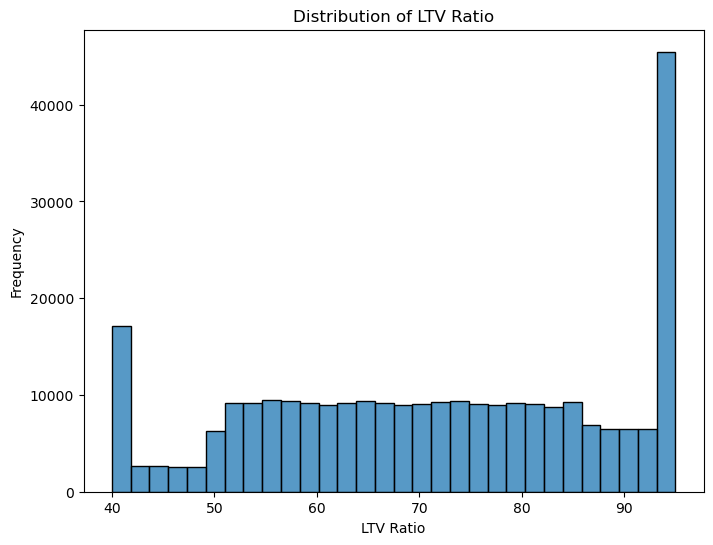

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(df['LTV Ratio'].dropna(), bins=30, kde=False)
plt.title('Distribution of LTV Ratio')
plt.xlabel('LTV Ratio')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


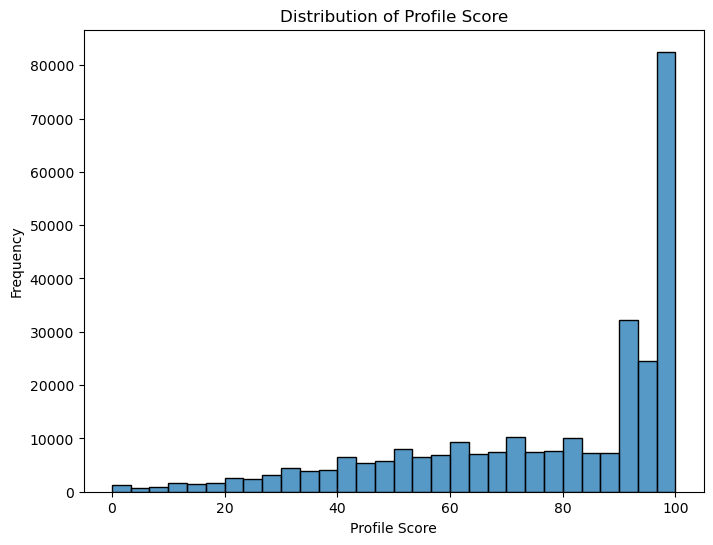

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Profile Score'].dropna(), bins=30, kde=False)
plt.title('Distribution of Profile Score')
plt.xlabel('Profile Score')
plt.ylabel('Frequency')
plt.show()


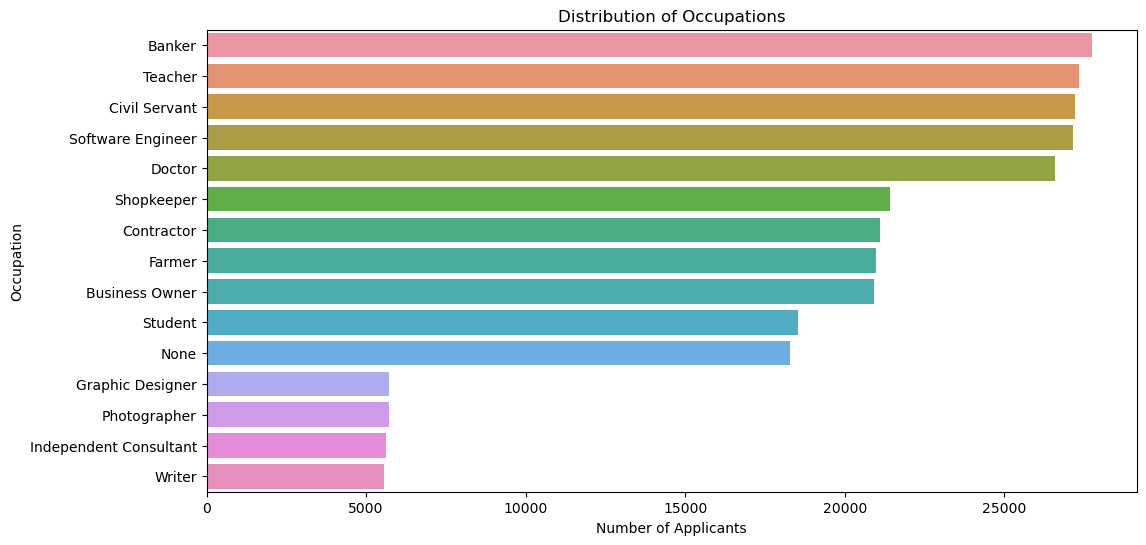

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Occupation', order=df['Occupation'].value_counts().index)
plt.title('Distribution of Occupations')
plt.xlabel('Number of Applicants')
plt.ylabel('Occupation')
plt.show()

Compute the mean, sum, range, and other summary statistics for numeric
columns.

In [52]:

numeric_columns = df.select_dtypes(include='number').columns

# Compute the mean, sum, and range for numeric columns
summary_stats = pd.DataFrame(index=numeric_columns)

summary_stats['mean'] = df[numeric_columns].mean()
summary_stats['sum'] = df[numeric_columns].sum()
summary_stats['min'] = df[numeric_columns].min()
summary_stats['max'] = df[numeric_columns].max()
summary_stats['range'] = summary_stats['max'] - summary_stats['min']
summary_stats['std'] = df[numeric_columns].std()
summary_stats['median'] = df[numeric_columns].median()
summary_stats['count'] = df[numeric_columns].count()
summary_stats['missing'] = df[numeric_columns].isna().sum()

print(summary_stats)

                                   mean           sum     min       max  \
Age                           44.005217  1.231512e+07    18.0      70.0   
Income                     76499.163856  2.140875e+10  9000.0  209000.0   
Credit Score                 582.953773  1.631431e+08   300.0     850.0   
Credit History Length        307.965146  8.618589e+07     6.0     611.0   
Number of Existing Loans       4.701693  1.315797e+06     0.0      10.0   
Loan Amount               105795.342773  2.960746e+10  5294.0  150000.0   
Loan Tenure                  133.340654  3.731618e+07    12.0     359.0   
LTV Ratio                     71.643101  2.004975e+07    40.0      95.0   
Profile Score                 77.350155  2.164690e+07     0.0     100.0   

                             range           std         median   count  \
Age                           52.0     15.311051      44.000000  279856   
Income                    200000.0  42875.575193   68000.000000  279856   
Credit Score            

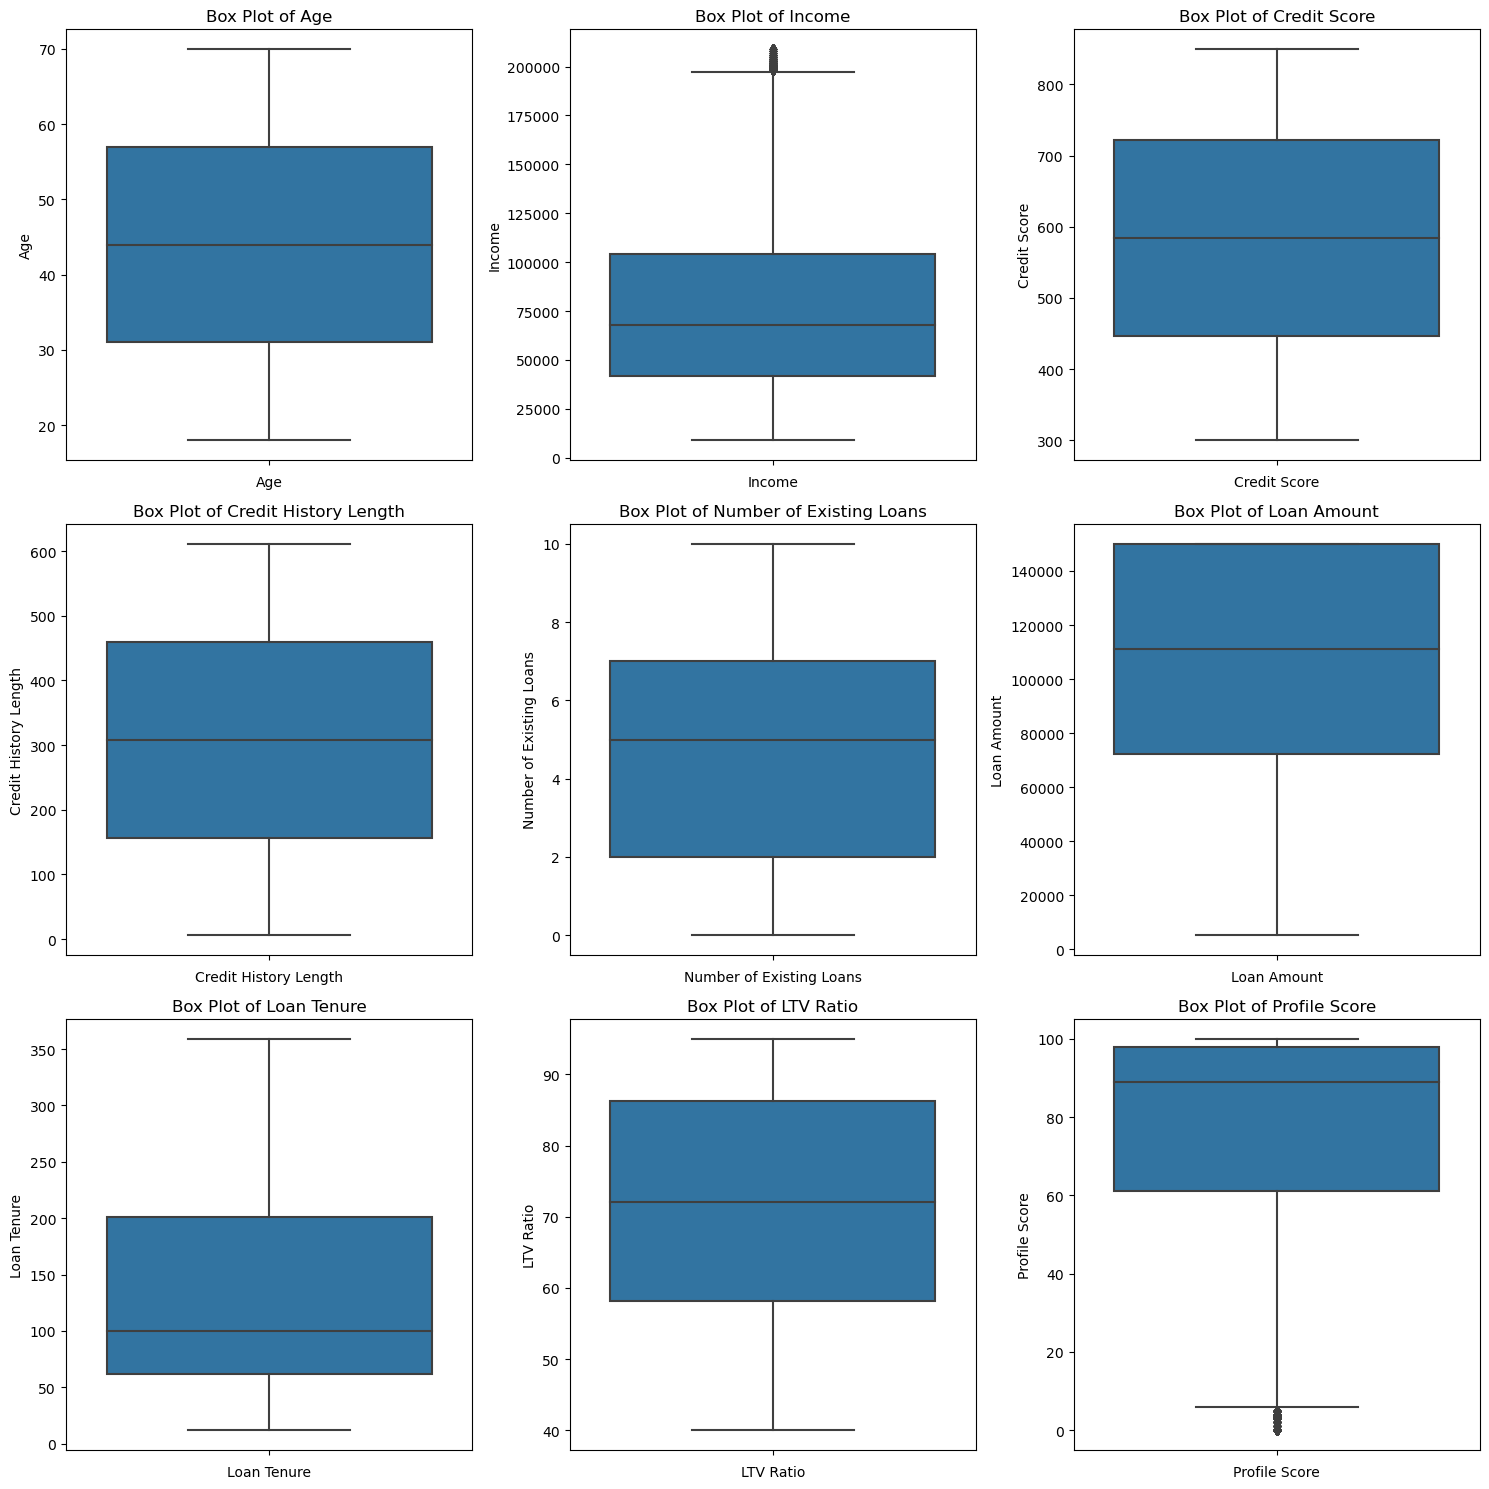

In [53]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot box plots
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col].dropna(), ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)
    plt.tight_layout()
plt.show()

Explore relationship between columns using scatter plots, bar charts etc.

Scatter Plot for Continuous Variables

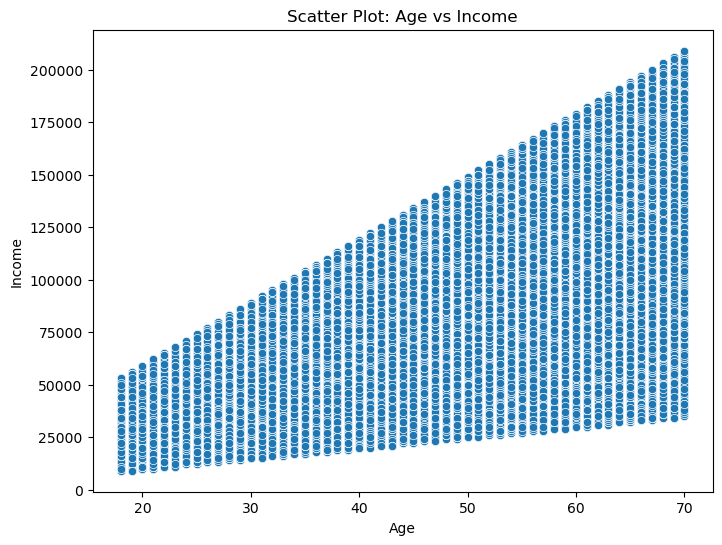

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Scatter Plot: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


Bar Chart for Categorical vs Numerical Variables

/var/folders/99/qs2y_kdd0sz89zdtycrs8qm40000gn/T/ipykernel_794/1130123523.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='Income', data=df, ci=None)


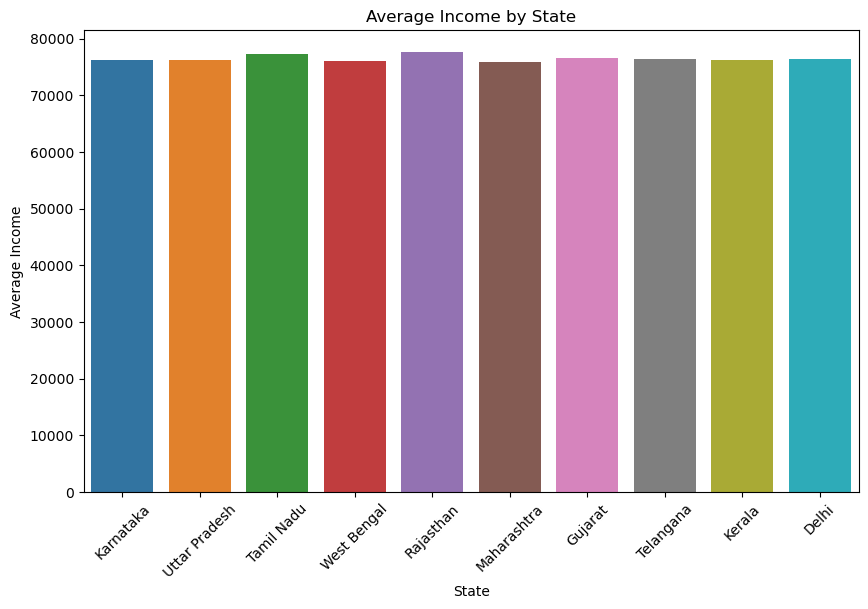

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Income', data=df, ci=None)
plt.title('Average Income by State')
plt.xlabel('State')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()



Boxplot for Categorical vs Numerical Variables

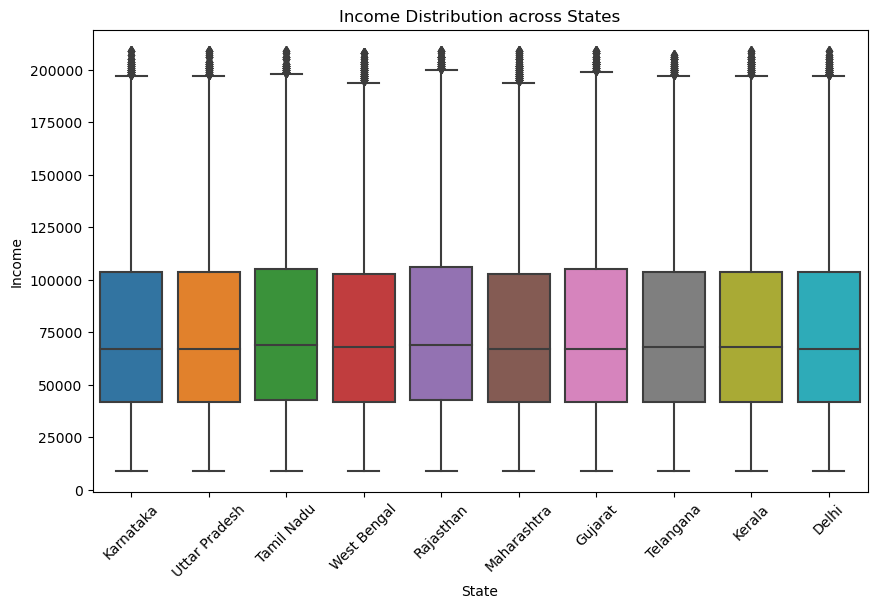

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Income', data=df)
plt.title('Income Distribution across States')
plt.xlabel('State')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()


Scatter Matrix for Multiple Variables

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

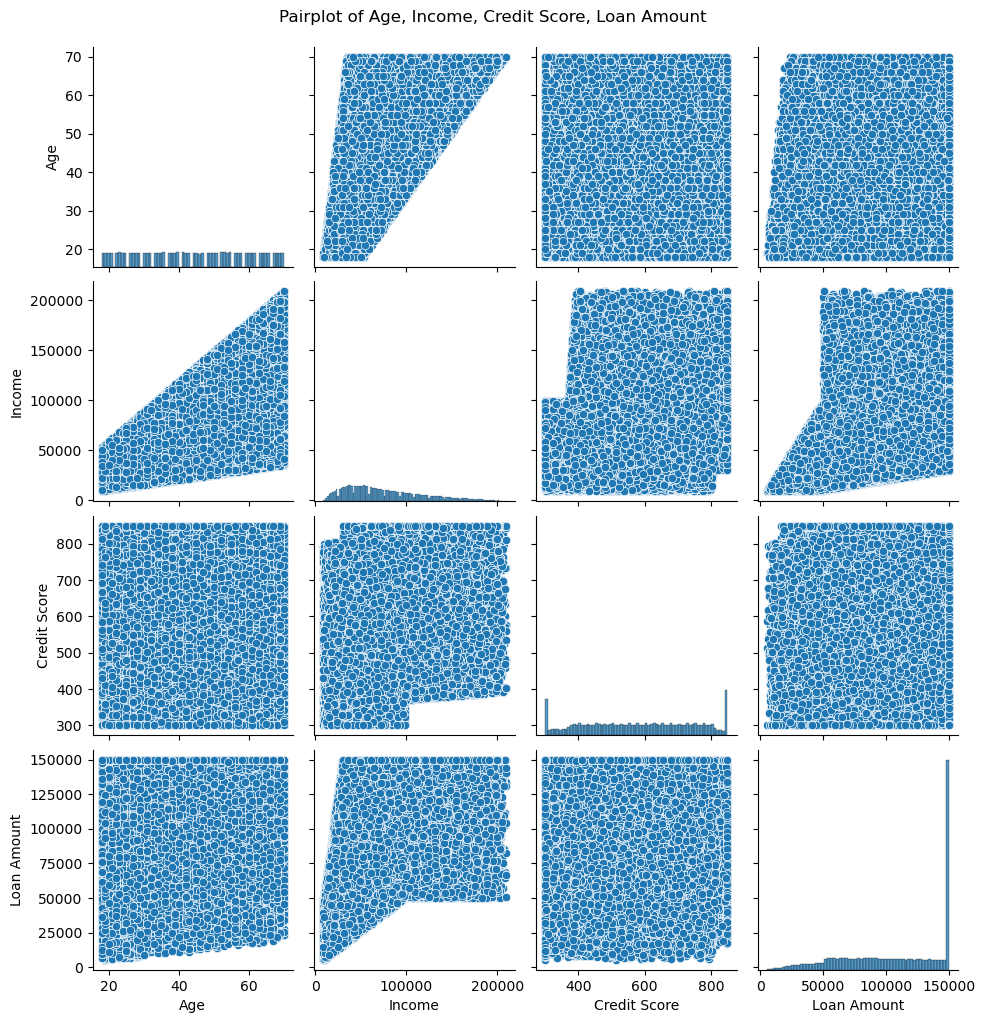

In [57]:
sns.pairplot(df[['Age', 'Income', 'Credit Score', 'Loan Amount']])
plt.suptitle('Pairplot of Age, Income, Credit Score, Loan Amount', y=1.02)
plt.show()


Heatmap for Correlation Matrix

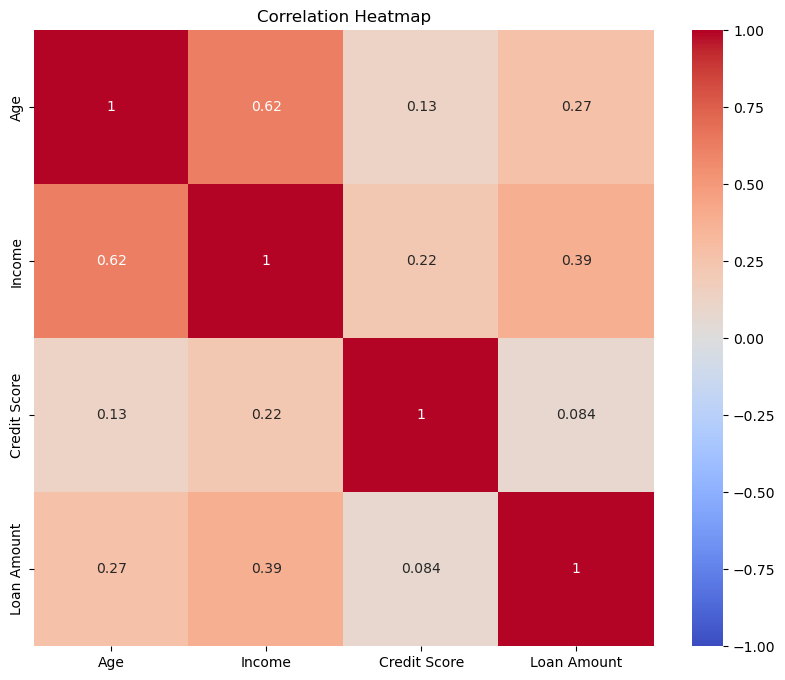

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Age', 'Income', 'Credit Score', 'Loan Amount']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


Bar Chart for Categorical vs Categorical Variables

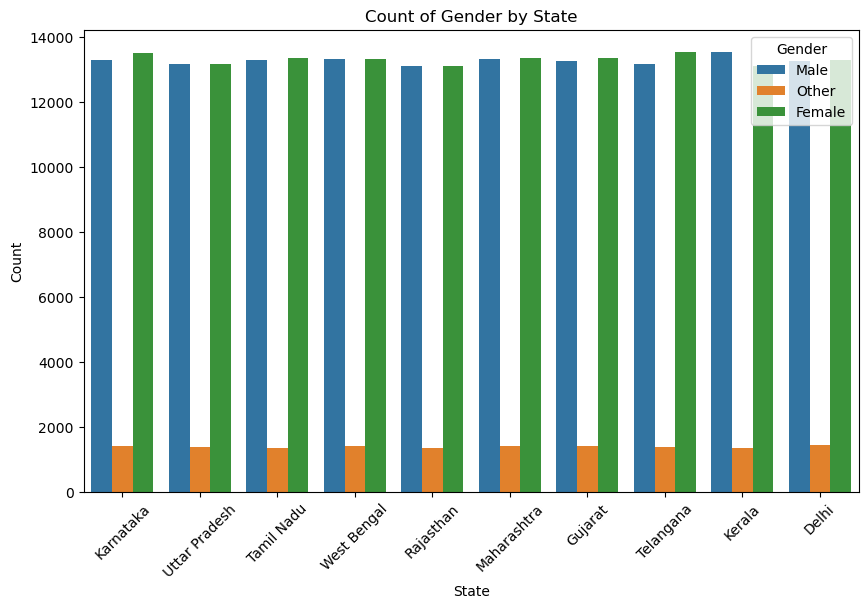

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='State', hue='Gender', data=df)
plt.title('Count of Gender by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


Violin Plot for Categorical vs Numerical Variables

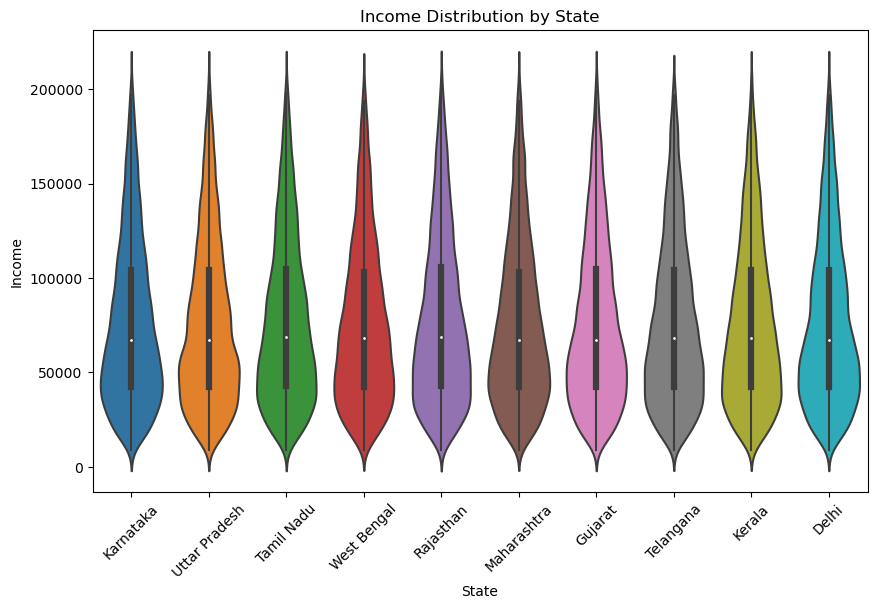

In [60]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='State', y='Income', data=df)
plt.title('Income Distribution by State')
plt.xlabel('State')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()


Investigate your initial research question, as well as any new questions
that arise during your exploration.

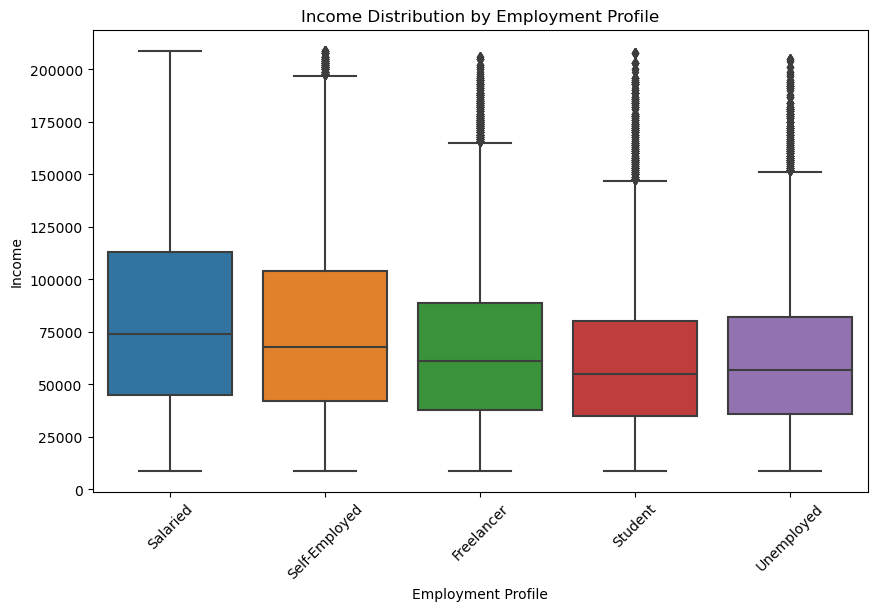

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment Profile', y='Income', data=df)
plt.title('Income Distribution by Employment Profile')
plt.xlabel('Employment Profile')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()


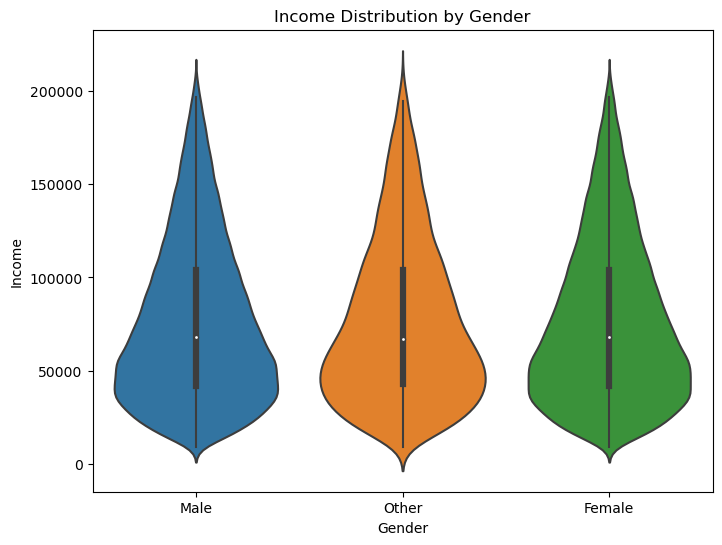

In [62]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Income', data=df)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()


During exploration, new questions might arise, such as:

How does credit score vary by loan tenure?

Are there differences in loan amounts between existing and new customers?

What is the distribution of profile scores across different occupations?




Research Question 1: How does income vary across different states?

Visualization: Boxplot and Bar Chart

Boxplot: Shows the distribution of income (Income) across different states (State). It helps visualize the spread, central tendency (median), and potential outliers in income for each state.

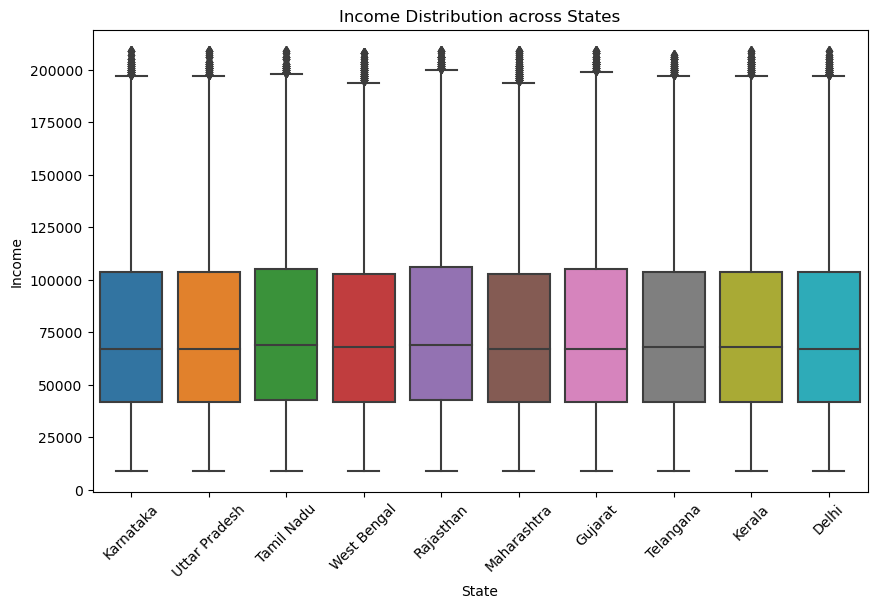

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Income', data=df)
plt.title('Income Distribution across States')
plt.xlabel('State')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()


Bar Chart: Displays the average income (Income) for each state (State). It provides a clear comparison of income levels between states.

/var/folders/99/qs2y_kdd0sz89zdtycrs8qm40000gn/T/ipykernel_794/679714207.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='Income', data=df, ci=None)


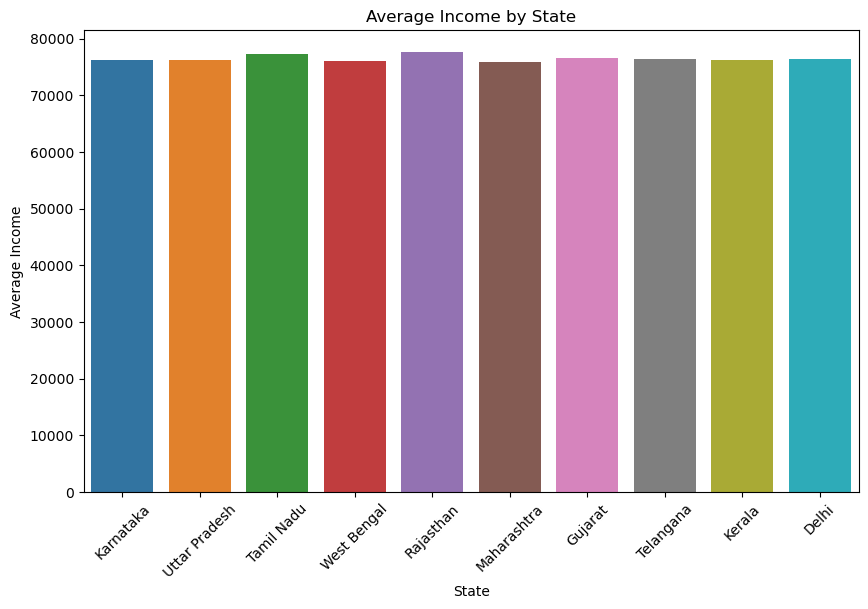

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Income', data=df, ci=None)
plt.title('Average Income by State')
plt.xlabel('State')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()


Research Question 2: How does credit score correlate with loan amount?

Visualization: Scatter Plot

Scatter Plot: Shows the relationship between credit score (Credit Score) and loan amount (Loan Amount). Each point represents an observation (a borrower's credit score and loan amount pair), allowing you to visually assess the correlation.
python
Copy

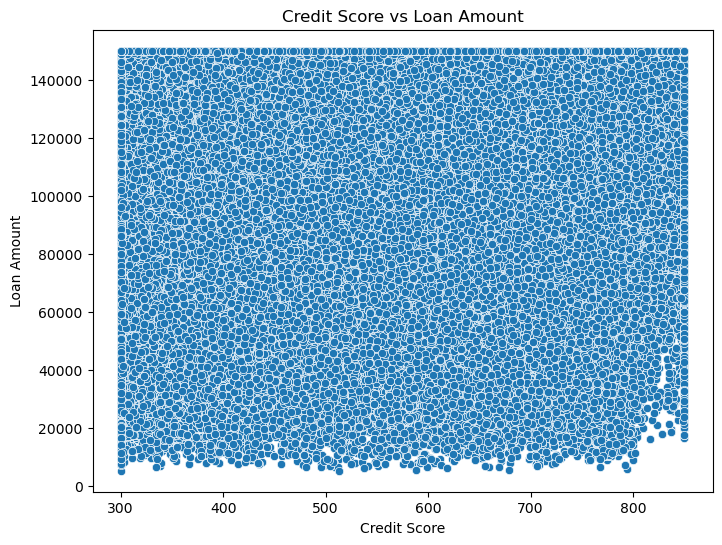

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Credit Score', y='Loan Amount', data=df)
plt.title('Credit Score vs Loan Amount')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount')
plt.show()


Research Question 3: What is the distribution of profile scores across different occupations?

Visualization: Boxplot

Boxplot: Illustrates the distribution of profile scores (Profile Score) across different occupations (Occupation). It provides insights into the spread and central tendency of profile scores within each occupation category.

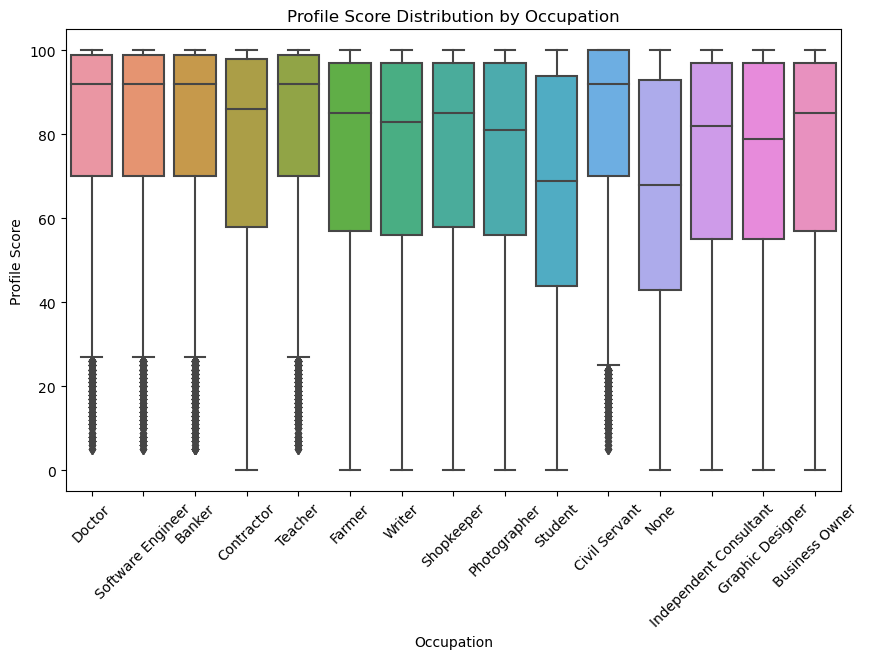

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Profile Score', data=df)
plt.title('Profile Score Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Profile Score')
plt.xticks(rotation=45)
plt.show()


Research Question 4: Are there differences in loan amounts between existing and new customers?

Visualization: Violin Plot

Violin Plot: Shows the distribution of loan amounts (Loan Amount) for existing and new customers (Existing Customer). It combines aspects of a box plot and a kernel density plot to display the distribution and density of loan amounts for each customer category.

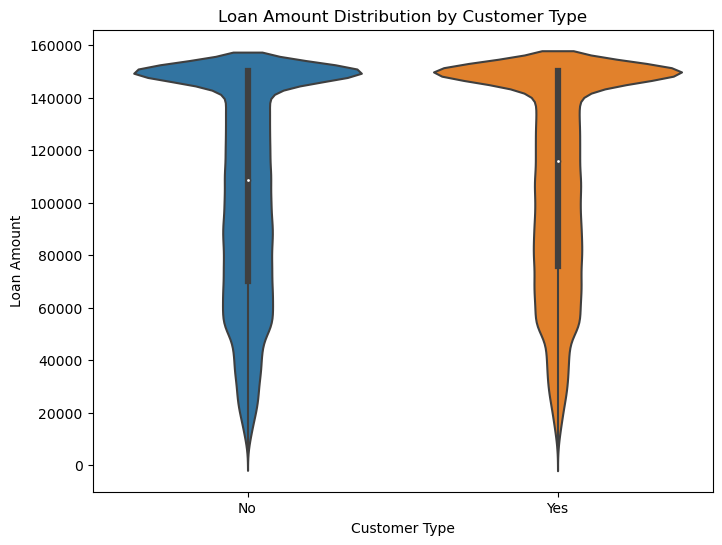

In [67]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Existing Customer', y='Loan Amount', data=df)
plt.title('Loan Amount Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Loan Amount')
plt.show()


part 5 develop ml and dl prediction model

In [68]:
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [69]:
print(df.columns)

Index(['Age', 'Gender', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure',
       'Existing Customer', 'State', 'City', 'LTV Ratio', 'Employment Profile',
       'Profile Score', 'Occupation'],
      dtype='object')


Loan Amount Prediction

In [70]:
# One-Hot Encoding categorical variables
categorical_columns = ['Gender', 'State', 'City', 'Employment Profile', 'Occupation']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [71]:
# Convert 'Existing Customer' column from Yes/No to 1/0
df['Existing Customer'] = df['Existing Customer'].apply(lambda x: 1 if x == 'Yes' else 0)


In [72]:
# Define features and target variable
X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

In [73]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store models and their MSE
models = []
mse_list = []

In [74]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
models.append(('Linear Regression', lr))
mse_list.append(('Linear Regression', mse))
print("Linear Regression MSE:", mse)

Linear Regression MSE: 259.2778159560949


In [75]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
models.append(('Ridge Regression', ridge))
mse_list.append(('Ridge Regression', mse))
print("Ridge Regression MSE:", mse)

Ridge Regression MSE: 259.27769896550933


In [76]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
models.append(('Lasso Regression', lasso))
mse_list.append(('Lasso Regression', mse))
print("Lasso Regression MSE:", mse)

Lasso Regression MSE: 268.6912877690219


In [77]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
models.append(('Decision Tree', dt))
mse_list.append(('Decision Tree', mse))
print("Decision Tree MSE:", mse)


Decision Tree MSE: 26.485206889158864


In [78]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
models.append(('Random Forest', rf))
mse_list.append(('Random Forest', mse))
print("Random Forest MSE:", mse)

Random Forest MSE: 27.256237990423788


In [79]:
# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
models.append(('Gradient Boosting', gb))
mse_list.append(('Gradient Boosting', mse))
print("Gradient Boosting MSE:", mse)

Gradient Boosting MSE: 198.63339039248197


In [80]:
# Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
models.append(('Neural Network', model))
mse_list.append(('Neural Network', mse))
print("Neural Network MSE:", mse)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step
Neural Network MSE: 380.29260475215597


In [81]:
# Print all model MSEs
for model_name, mse in mse_list:
    print(f"{model_name} MSE: {mse}")

Linear Regression MSE: 259.2778159560949
Ridge Regression MSE: 259.27769896550933
Lasso Regression MSE: 268.6912877690219
Decision Tree MSE: 26.485206889158864
Random Forest MSE: 27.256237990423788
Gradient Boosting MSE: 198.63339039248197
Neural Network MSE: 380.29260475215597


Multiclass Classification: Categorize customers into multiple risk levels (e.g., low, medium, high).

In [82]:

# Convert Credit Score to Risk Levels
def credit_score_to_risk(score):
    if score >= 750:
        return 'Low'
    elif score >= 600:
        return 'Medium'
    else:
        return 'High'

df['Risk Level'] = df['Credit Score'].apply(credit_score_to_risk)

# Define features and target variable
X = df.drop(['Credit Score', 'Risk Level'], axis=1)
y = df['Risk Level']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store models and their accuracy
models = []
accuracy_list = []

In [83]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
models.append(('Logistic Regression', lr))
accuracy_list.append(('Logistic Regression', accuracy))
print("Logistic Regression Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7560387336525406
              precision    recall  f1-score   support

        High       0.87      0.94      0.90     29638
         Low       0.59      0.52      0.55     11187
      Medium       0.61      0.57      0.59     15147

    accuracy                           0.76     55972
   macro avg       0.69      0.68      0.68     55972
weighted avg       0.75      0.76      0.75     55972



In [84]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
models.append(('Decision Tree', dt))
accuracy_list.append(('Decision Tree', accuracy))
print("Decision Tree Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.9964446508968771
              precision    recall  f1-score   support

        High       1.00      1.00      1.00     29638
         Low       0.99      0.99      0.99     11187
      Medium       0.99      0.99      0.99     15147

    accuracy                           1.00     55972
   macro avg       1.00      1.00      1.00     55972
weighted avg       1.00      1.00      1.00     55972



In [85]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
models.append(('Random Forest', rf))
accuracy_list.append(('Random Forest', accuracy))
print("Random Forest Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.997034231401415
              precision    recall  f1-score   support

        High       1.00      1.00      1.00     29638
         Low       0.99      1.00      1.00     11187
      Medium       1.00      0.99      0.99     15147

    accuracy                           1.00     55972
   macro avg       1.00      1.00      1.00     55972
weighted avg       1.00      1.00      1.00     55972



In [86]:
# LightGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
models.append(('LightGBM', lgbm))
accuracy_list.append(('LightGBM', accuracy))
print("LightGBM Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1486
[LightGBM] [Info] Number of data points in the train set: 223884, number of used features: 60
[LightGBM] [Info] Start training from score -0.641418
[LightGBM] [Info] Start training from score -1.608630
[LightGBM] [Info] Start training from score -1.297210
LightGBM Accuracy: 0.9745408418494962
              precision    recall  f1-score   support

        High       0.99      1.00      0.99     29638
         Low       0.92      1.00      0.96     11187
      Medium       1.00      0.91      0.95     15147

    accuracy                           0.97     55972
   macro avg       0.97      0.97      0.97     55972
weighted avg       0.98      0.97      0

In [87]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
models.append(('SVM', svm))
accuracy_list.append(('SVM', accuracy))
print("SVM Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.5295147573786894


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        High       0.53      1.00      0.69     29638
         Low       0.00      0.00      0.00     11187
      Medium       0.00      0.00      0.00     15147

    accuracy                           0.53     55972
   macro avg       0.18      0.33      0.23     55972
weighted avg       0.28      0.53      0.37     55972



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
# Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
# Convert y_train and y_test to numerical labels
y_train_numeric = y_train.astype('category').cat.codes
y_test_numeric = y_test.astype('category').cat.codes

model.fit(X_train, y_train_numeric, epochs=50, batch_size=10, verbose=0)

_, accuracy = model.evaluate(X_test, y_test_numeric, verbose=0)
models.append(('Neural Network', model))
accuracy_list.append(('Neural Network', accuracy))
print("Neural Network Accuracy:", accuracy)

# Print all model accuracies
for model_name, accuracy in accuracy_list:
    print(f"{model_name} Accuracy: {accuracy}")

Neural Network Accuracy: 0.9358250498771667
Logistic Regression Accuracy: 0.7560387336525406
Decision Tree Accuracy: 0.9964446508968771
Random Forest Accuracy: 0.997034231401415
LightGBM Accuracy: 0.9745408418494962
SVM Accuracy: 0.5295147573786894
Neural Network Accuracy: 0.9358250498771667
